In [73]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns  

In [74]:
train_data = pd.read_csv('train_titanic.csv')
test_data = pd.read_csv('test_titanic.csv')

In [75]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [78]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [80]:
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [81]:
avg_age = train_data.Age.mean()
train_data.Age.replace(np.nan, avg_age, inplace = True)

avg_age = test_data.Age.mean()
test_data.Age.replace(np.nan, avg_age, inplace = True)


In [82]:
avg_fare = test_data.Fare.mean()
test_data.Fare.replace(np.nan, avg_fare, inplace = True)

In [83]:
freq_port = train_data.Embarked.mode()[0]
train_data.Embarked.replace(np.nan, freq_port, inplace = True)

In [84]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [119]:
train_data.duplicated().sum()

0

In [120]:
test_data.duplicated().sum()

0

In [121]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

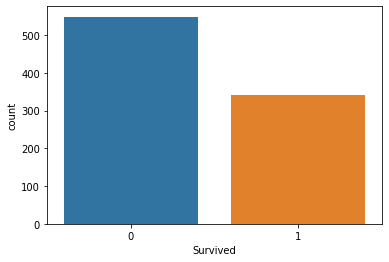

In [87]:
sns.countplot(x= 'Survived', data = train_data)

In [88]:
women =train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women) * 100

print('Percentage of women survivors : ', rate_women)

Percentage of women survivors :  74.20382165605095


In [89]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men) * 100
print('Percentage of men survivors: ',rate_men)

Percentage of men survivors:  18.890814558058924


In [90]:
result = train_data.groupby('Sex')['Survived'].value_counts(normalize = True)
result

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [91]:
print('Percentage of women who survived        :  ',result[0]*100)
print('Percentage of women who did not survive :  ', result[1]*100)
print('Percentage of men who survived          :  ', result[2]*100)
print('Percentage of men who did not survive   :  ', result[3]*100)

Percentage of women who survived        :   74.20382165605095
Percentage of women who did not survive :   25.796178343949045
Percentage of men who survived          :   81.10918544194108
Percentage of men who did not survive   :   18.890814558058924


<AxesSubplot:xlabel='Survived', ylabel='count'>

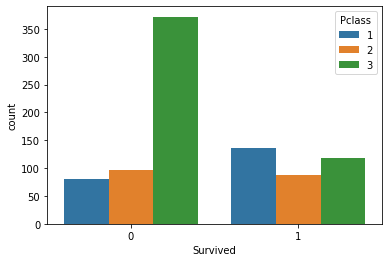

In [92]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)

In [93]:
train_data.groupby('Pclass')['Survived'].value_counts(normalize = True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Age'>

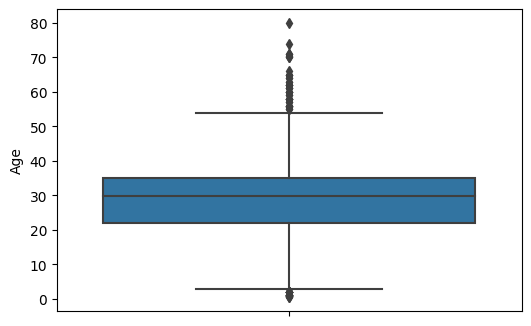

In [94]:
plt.figure(dpi = 100)
sns.boxplot(y = 'Age', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

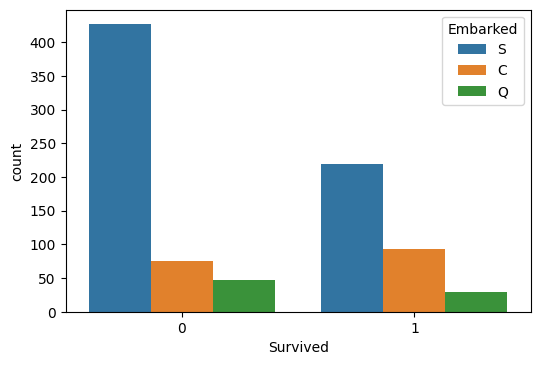

In [95]:
plt.figure(dpi = 100)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

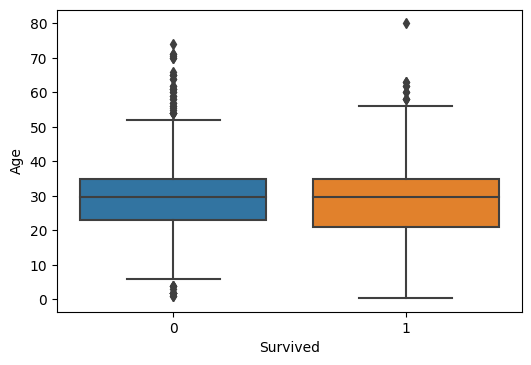

In [96]:
plt.figure(dpi = 100)
sns.boxplot(x = 'Survived', y = 'Age', data = train_data)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

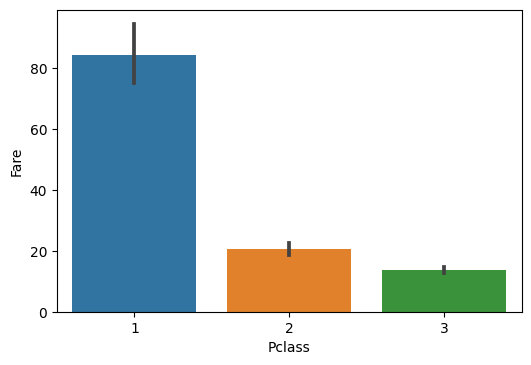

In [97]:
plt.figure(dpi = 100)
sns.barplot(x = 'Pclass', y = 'Fare', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

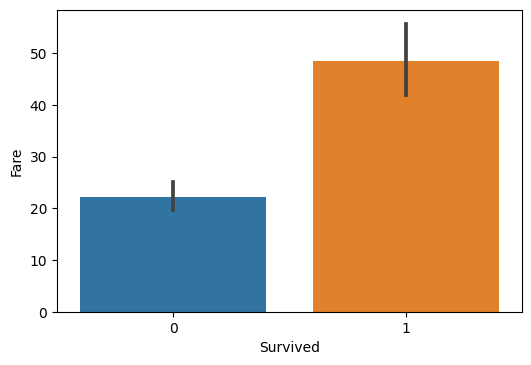

In [98]:
plt.figure(dpi = 100)
sns.barplot(x = 'Survived', y = 'Fare', data = train_data)

<AxesSubplot:>

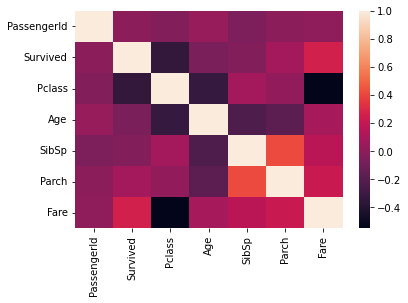

In [99]:
sns.heatmap(train_data.corr())

# Dealing with categorical Values

In [100]:
train_data['Sex'] = train_data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)

In [101]:
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

In [102]:
train_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)


In [103]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [104]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [105]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


# Binning

In [107]:
dataset = [train_data, test_data]
for data in dataset:
    data.loc[data['Age'] <=20, 'Age'] =0
    data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 1
    data.loc[(data['Age'] > 40) & (data['Age'] <= 60), 'Age'] = 2
    data.loc[data['Age'] <= 60, 'Age'] = 3

In [108]:
for data in dataset:
    data.loc[data['Fare'] <=8, 'Fare'] =0
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 15), 'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 31), 'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3

In [109]:
for data in dataset:
    data['Age'] = data['Age'].astype(int)
    data['Fare'] = data['Fare'].astype(int)

In [110]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,3,1,0,0,0
1,2,1,1,1,3,1,0,3,1
2,3,1,3,1,3,0,0,0,0
3,4,1,1,1,3,1,0,3,0
4,5,0,3,0,3,0,0,1,0


In [111]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1).values
Y_train = train_data['Survived'].values
X_test = test_data.drop('PassengerId', axis = 1).values

In [112]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(891, 7)
(891,)
(418, 7)


# Training

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state= 5)

In [116]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

# Evaluation

In [117]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
print('Training Accuracy : ', train_accuracy)
print('Testing Accuracy : ', test_accuracy)

Training Accuracy :  0.7907303370786517
Testing Accuracy :  0.8212290502793296
